In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy import stats

In [193]:
dfx = pd.read_csv("healthdata.csv")
dfy = pd.read_csv("healthdata.csv")
dfo = pd.read_csv("healthdata.csv")

In [194]:
def laplaceMechanism(x, epsilon):
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.laplace(0, 1.0/epsilon, 1)[0]
        if (private_val > 0):
            not_in_range = False
    return private_val

def gaussianMechanism(x, epsilon, delta):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.normal(0, sigma, 1)[0]
        if (private_val > 0):
            not_in_range = False
    return private_val

In [195]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [196]:
epsilons = np.logspace(-2,1,25)
num_of_runs_for_epsilon = 10
df_original = pd.read_csv("healthdata.csv")

In [197]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        df_private = pd.read_csv("healthdata.csv")
        df_private['wage'] = df_private['wage'].apply(laplaceMechanism, args=(epsilon,))
        average_rmse.append(mean_squared_error(df_original['wage'].to_numpy().tolist(), 
                df_private['wage'].to_numpy().tolist(), squared=False))
        average_mape.append(mean_absolute_percentage_error(df_original['wage']
                .to_numpy().tolist(), df_private['wage'].to_numpy().tolist()))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

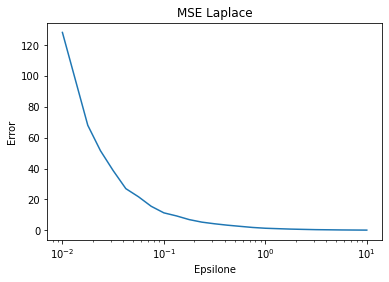

In [198]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilone')
plt.ylabel('Error')
plt.title("MSE Laplace")
plt.show()

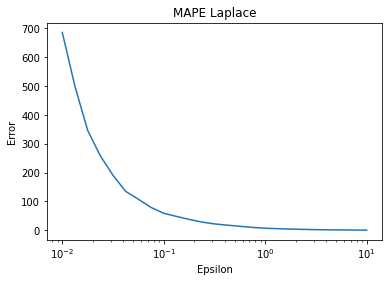

In [199]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

In [200]:
delta_values = [1/100, 1/200, 1/1000, 1/100000]
gaussian_error = []
for delta_value in delta_values:
       gaussian_mse = []
       gaussian_mape = []
       for epsilon in epsilons:
              average_rmse = []
              average_mape = []
              for x in range(num_of_runs_for_epsilon):
                     df_private = pd.read_csv("healthdata.csv")
                     df_private['wage'] = df_private['wage'].apply(gaussianMechanism, args=(epsilon,delta_value))
                     average_rmse.append((mean_squared_error(df_original['wage'], 
                            df_private['wage'].to_numpy().tolist(), squared=False)))
                     average_mape.append(mean_absolute_percentage_error(df_original['wage']
                            .to_numpy().tolist(),df_private['wage'].to_numpy().tolist()))

              gaussian_mse.append(np.mean(average_rmse))
              gaussian_mape.append(np.mean(average_mape))
       gaussian_error.append([gaussian_mse, gaussian_mape])

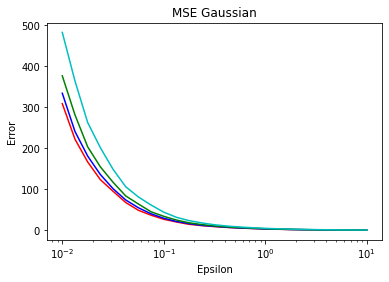

In [201]:
colors = ['r', 'b', 'g', 'c']
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[0], colors[idx])
    
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MSE Gaussian")
plt.show()

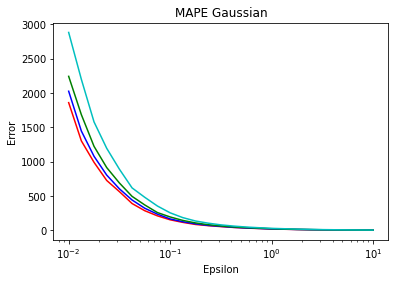

In [202]:
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Gaussian")
plt.show()
#https://www.sciencedirect.com/science/article/pii/S0166218X1630169X